In [ ]:
# Import the necessary libraries.

import pandas as pd

In [ ]:
# Reading the dataset.

df = pd.read_csv('sales_data_with_discounts.csv')

# ●	Objective: To compute and analyze basic statistical measures for numerical columns in the dataset.

In [ ]:
df.shape

(450, 13)

In [ ]:
list(df.columns)

['Date',
 'Day',
 'SKU',
 'City',
 'Volume',
 'BU',
 'Brand',
 'Model',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [ ]:
df.dtypes

,0
Date,object
Day,object
SKU,object
City,object
Volume,int64
BU,object
Brand,object
Model,object
Avg Price,int64
Total Sales Value,int64


In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [ ]:
descriptive_stats = df[numerical_columns].describe()
print(descriptive_stats)

           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%        5316.495427     47847.912852  
max   

In [ ]:
df[numerical_columns].count()

,0
Volume,450
Avg Price,450
Total Sales Value,450
Discount Rate (%),450
Discount Amount,450
Net Sales Value,450


In [ ]:
descriptive_stats = pd.DataFrame({
    'mean': df[numerical_columns].mean(),
    'median': df[numerical_columns].median(),
    'Mode': df[numerical_columns].mode().iloc[0],
    'std': df[numerical_columns].std(),
})
display(descriptive_stats)

,mean,median,Mode,std
Volume,5.066667,4.000000,3.000000,4.231602
Avg Price,10453.433333,1450.000000,400.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.000000,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,4.220602
Discount Amount,3346.499424,988.933733,69.177942,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,46358.656624


 **Interpretation of Descriptive Statistics**


*  Most transactions sell only a few units — typically 3 to 5 items. The median (4) and mode (3) show small purchases are the norm, while the mean (5.07) and a standard deviation of (4.23) tell us there are some larger orders that pull the average up.

*  Product prices are very uneven. Although the average price looks large (≈10,453), the median is much smaller (≈1,450) and the most common price is only 400 — this means a few expensive items are skewing the mean. The very high standard deviation confirms price varies widely across SKUs.

*   The total sales and net sales figures follow the same pattern: most transactions are modest (medians around 5,700 and 4,678 respectively), but a handful of big sales push the averages way higher (means ≈33,813 and ≈30,466). In short, a small number of high-value sales dominate the overall totals.

*  Discounts are more consistent in percentage terms — around 15% on average with little spread — but the actual discount amounts vary a lot. The median discount is about 989 while the mean is higher (≈3,346), showing that large discounts are given only on some high-value orders


*  Bottom line: Most sales are small in quantity and value, while a few large, expensive transactions cause the averages to look much bigger than the “typical” sale. Use medians (or visualizations like boxplots) instead of means when you want to describe a typical transaction, and investigate the high-value outliers separately.

 **Overall insight**: The dataset is highly skewed — most sales are small in volume and value, but a few high-value transactions and expensive products raise the averages significantly. Discounts are applied consistently (around 15%), but their amounts vary widely depending on order size and product type.

# **Data Visualization**


* Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

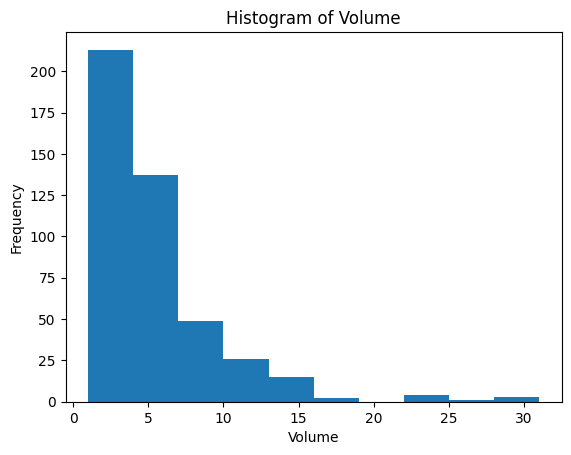

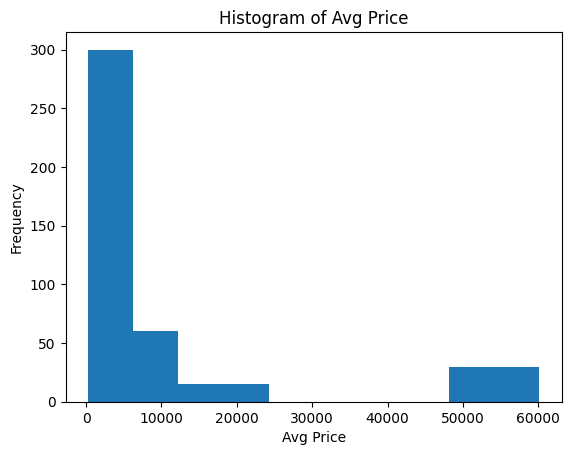

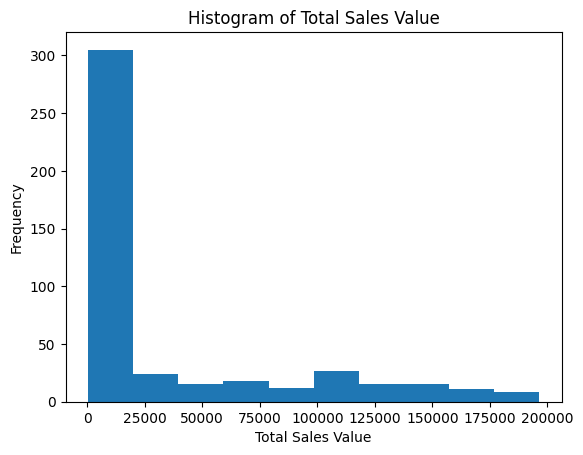

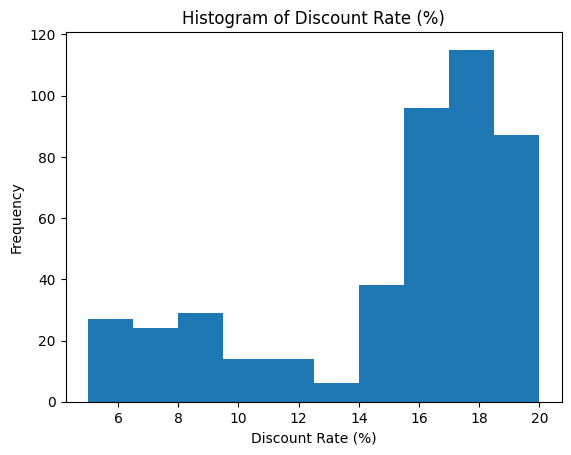

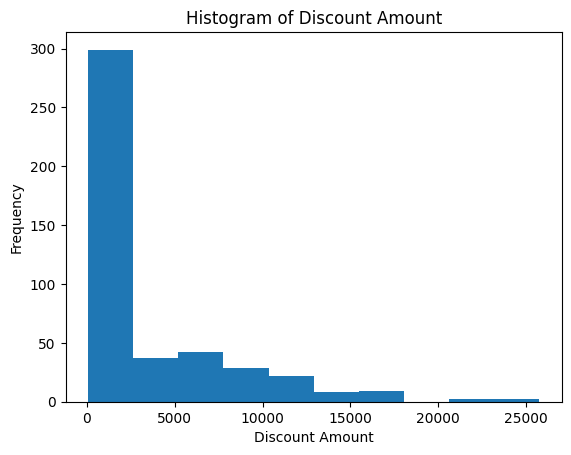

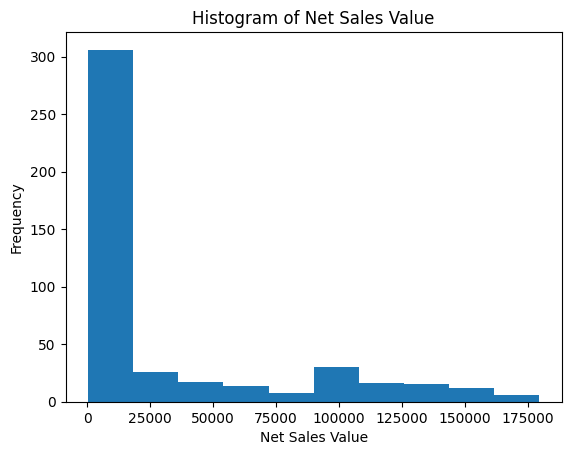

In [ ]:
# Histogram for each numerical column.

for column in numerical_columns:
    plt.figure()  # Create a new figure for each histogram
    plt.hist(df[column])
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Most orders have small quantities, while a few large orders stand out.
Product prices are generally low to moderate, with some expensive items skewing the data.
Total and net sales are dominated by a few very high-value transactions.
Discount amounts vary widely, but discount rates remain fairly consistent around 10–20%.
Overall, most numeric features are right-skewed, showing that a few high values strongly influence the dataset.

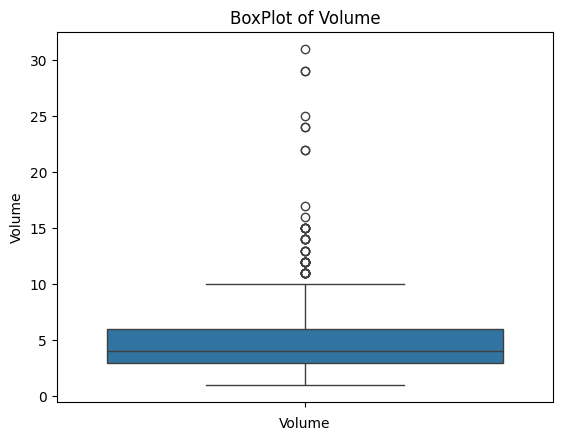

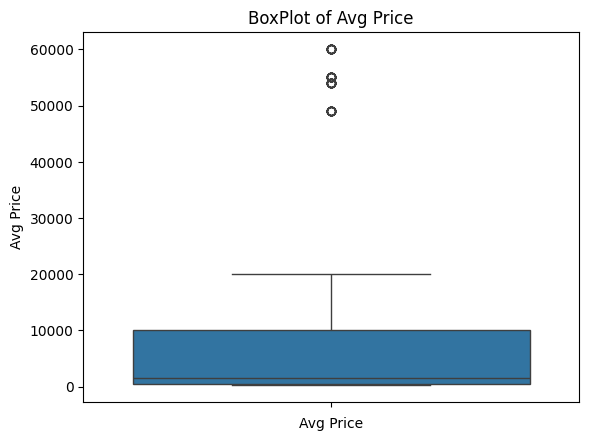

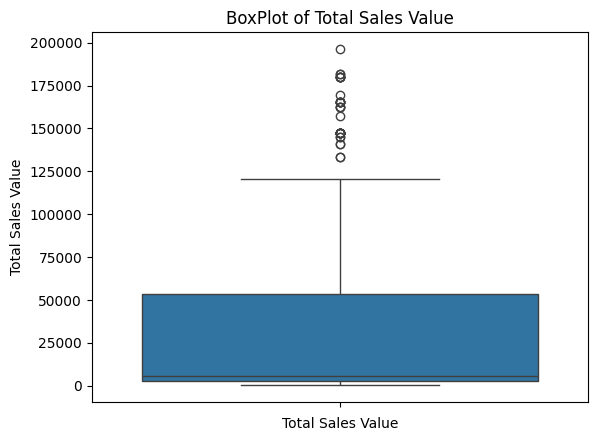

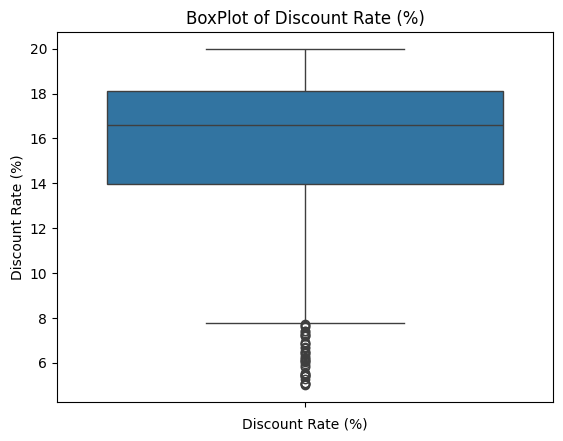

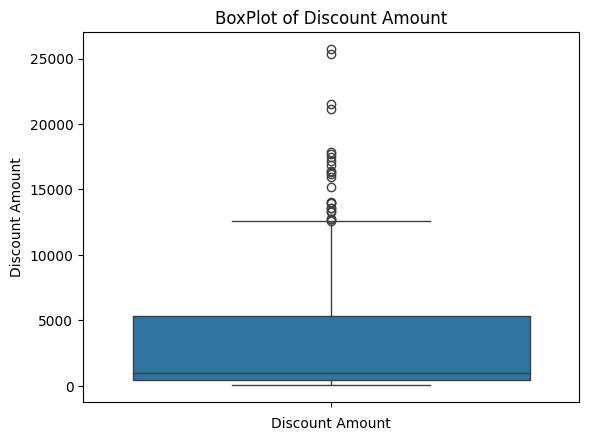

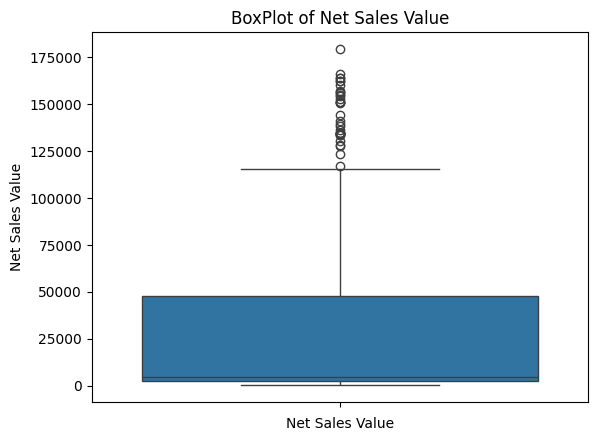

In [ ]:
# Boxplot

for column in numerical_columns:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(df[column])
    plt.title(f'BoxPlot of {column}')
    plt.xlabel(column)
    plt.show()

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


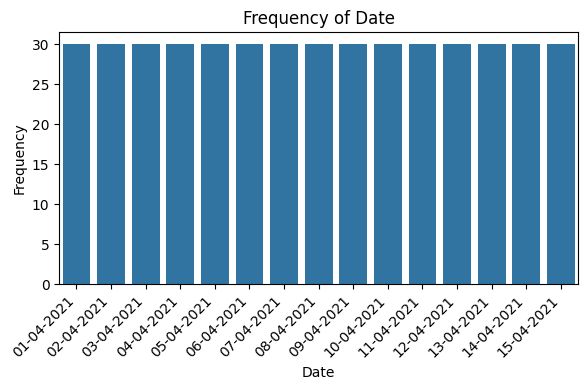

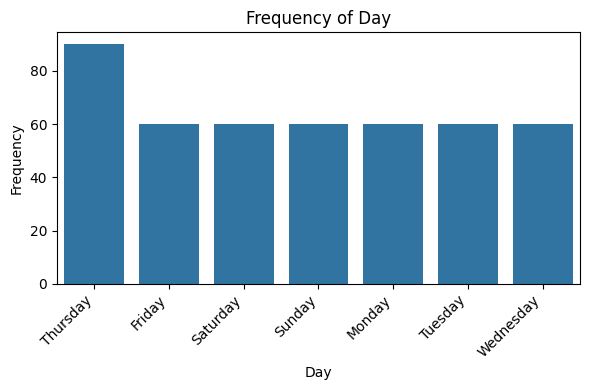

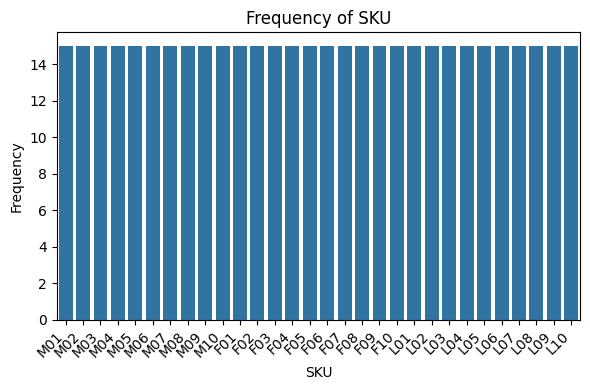

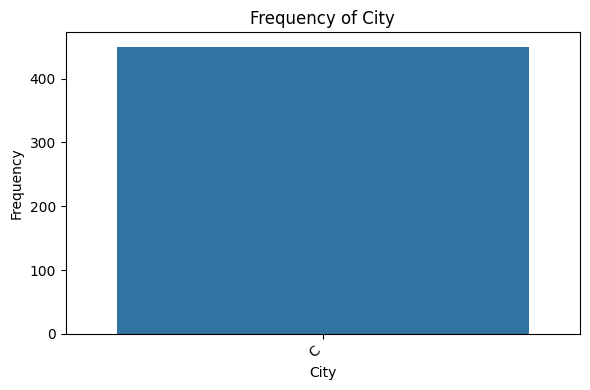

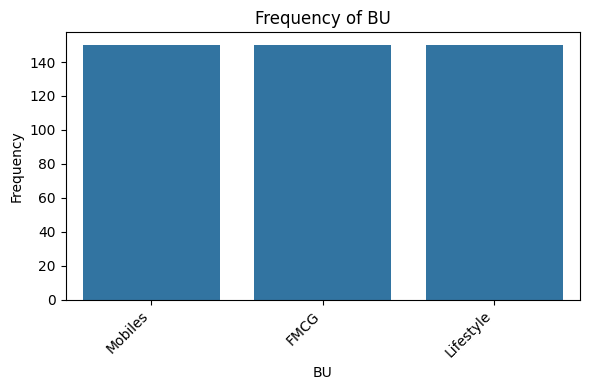

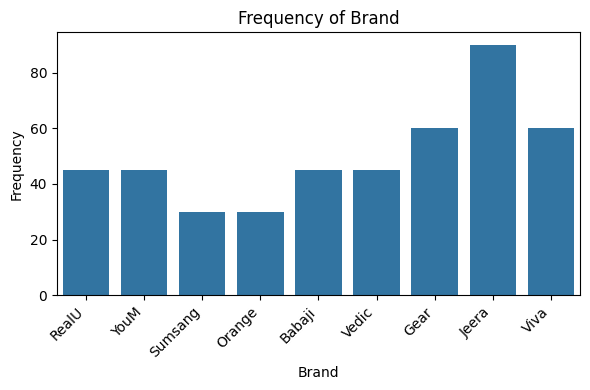

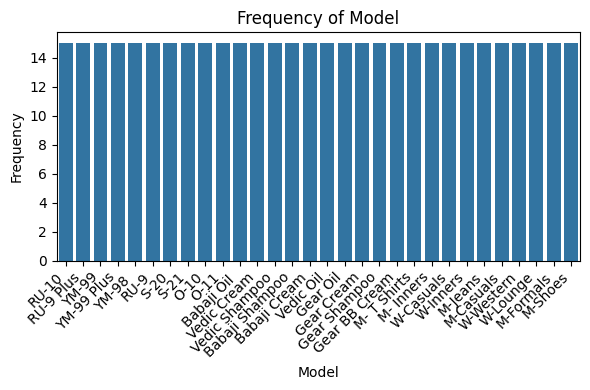

In [ ]:
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=column)
    plt.title(f'Frequency of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
# Formula method

for column in numerical_columns:
    mean = df[column].mean()
    std = df[column].std()

    # Standardization
    df[f'{column}_zscore'] = (df[column] - mean) / std

    print(df[f'{column}_zscore'])

0      2.347417
1      1.165831
2      0.456880
3      0.220563
4     -0.488389
         ...   
445   -0.724706
446    0.220563
447   -0.724706
448   -0.488389
449   -0.961023
Name: Volume_zscore, Length: 450, dtype: float64
0      0.091072
1     -0.019548
2      0.312312
3      0.533552
4     -0.130168
         ...   
445   -0.506277
446   -0.434374
447   -0.489684
448   -0.473091
449   -0.406719
Name: Avg Price_zscore, Length: 450, dtype: float64
0      2.922469
1      1.329516
2      1.561038
3      1.717365
4     -0.188242
         ...   
445   -0.617647
446   -0.360400
447   -0.605774
448   -0.556303
449   -0.607753
Name: Total Sales Value_zscore, Length: 450, dtype: float64
0     -0.829365
1     -0.851714
2     -1.350129
3     -1.947555
4      0.672990
         ...   
445    0.075924
446    0.450596
447    0.902788
448    0.388042
449    0.042188
Name: Discount Rate (%)_zscore, Length: 450, dtype: float64
0      3.948422
1      1.846958
2      1.621190
3      1.112568
4      0.22

# Standardization of Numerical Variables

In [ ]:
# Standardization of Numerical Variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Create a copy of dataset
df_std = df.copy()

# Apply standardization
df_std[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Show first few rows
df_std.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Volume_zscore,Avg Price_zscore,Total Sales Value_zscore,Discount Rate (%)_zscore,Discount Amount_zscore,Net Sales Value_zscore
0,01-04-2021,Thursday,M01,C,2.350029,Mobiles,RealU,RU-10,0.091173,2.925721,-0.830289,3.952816,2.804756,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638
1,01-04-2021,Thursday,M02,C,1.167129,Mobiles,RealU,RU-9 Plus,-0.019570,1.330995,-0.852661,1.849014,1.271026,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,01-04-2021,Thursday,M03,C,0.457388,Mobiles,YouM,YM-99,0.312659,1.562775,-1.351631,1.622995,1.545675,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957
3,01-04-2021,Thursday,M04,C,0.220808,Mobiles,YouM,YM-99 Plus,0.534146,1.719276,-1.949723,1.113807,1.765810,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847
4,01-04-2021,Thursday,M05,C,-0.488932,Mobiles,YouM,YM-98,-0.130313,-0.188452,0.673739,0.227852,-0.227595,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342


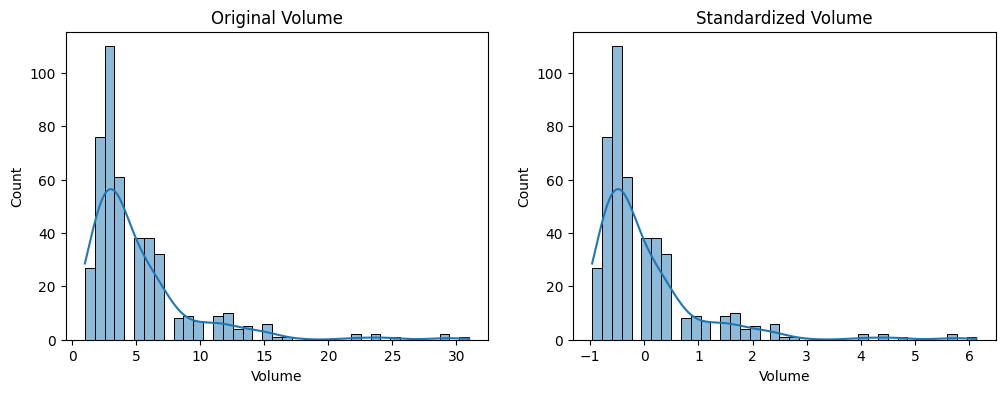

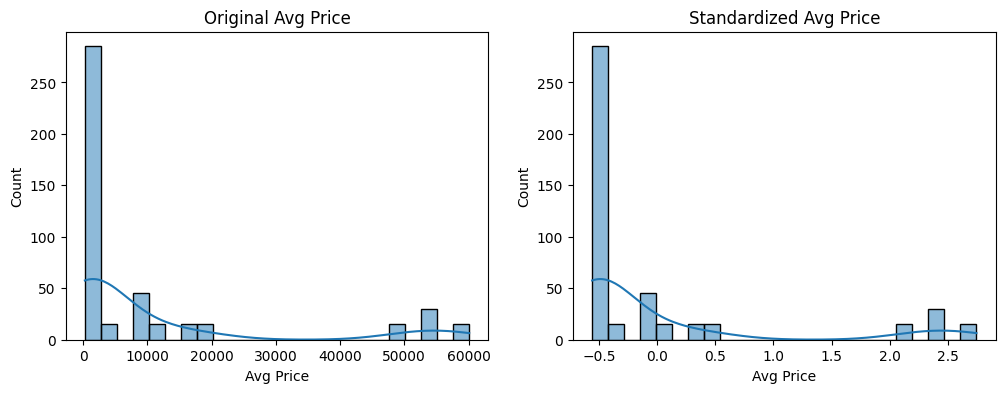

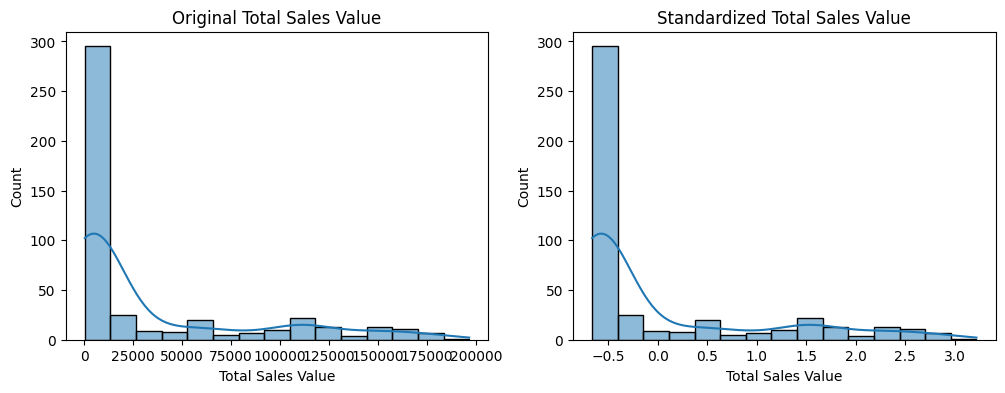

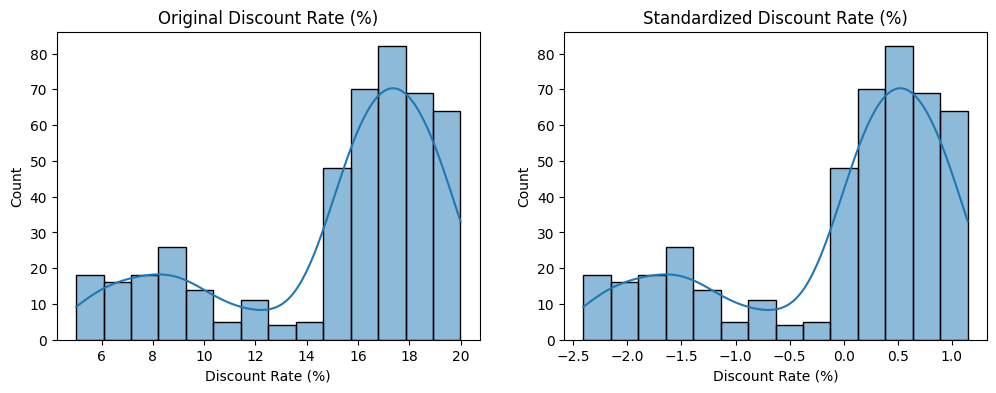

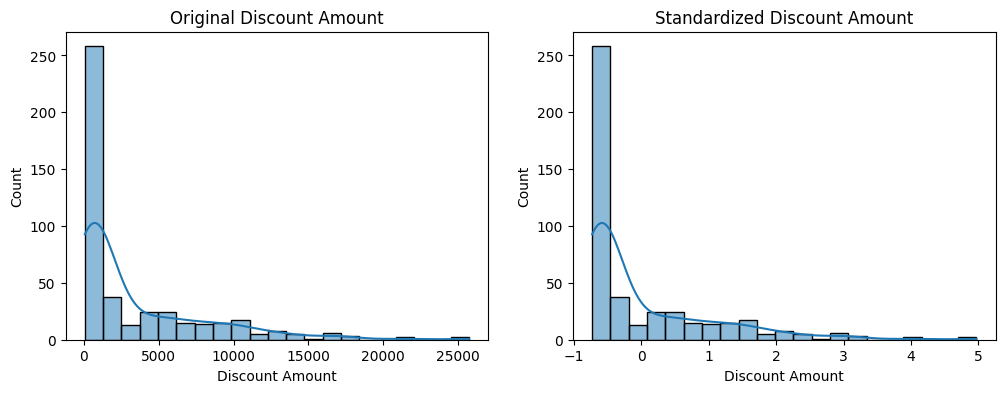

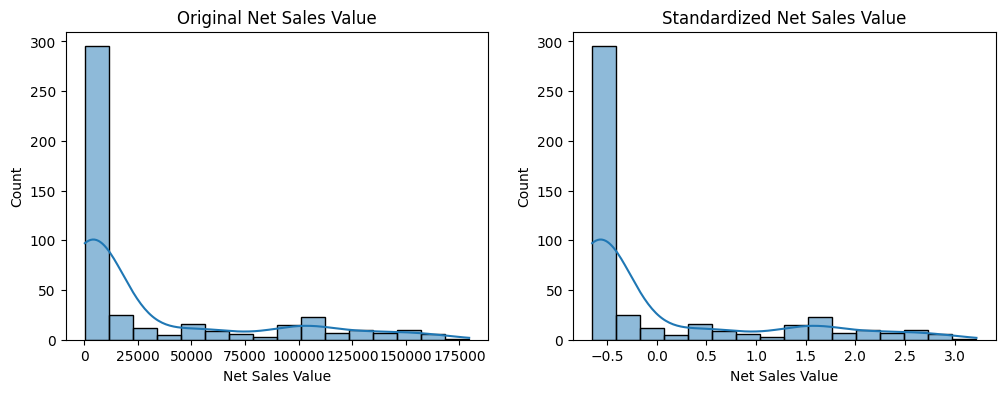

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(12,4))

    # Before standardization
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Original {col}')

    # After standardization
    plt.subplot(1,2,2)
    sns.histplot(df_std[col], kde=True)
    plt.title(f'Standardized {col}')

    plt.show()


# Conversion of Categorical Data into Dummy Variables

In [ ]:
# One-hot encoding
df_encoded = pd.get_dummies(df_std, columns=categorical_columns, drop_first=True)

# Show first few rows
df_encoded.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Volume_zscore,Avg Price_zscore,Total Sales Value_zscore,Discount Rate (%)_zscore,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756,2.347417,0.091072,2.922469,-0.829365,...,False,False,False,False,False,False,False,False,False,False
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026,1.165831,-0.019548,1.329516,-0.851714,...,False,False,False,False,False,False,False,False,False,False
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675,0.456880,0.312312,1.561038,-1.350129,...,False,False,False,False,False,False,False,False,True,False
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810,0.220563,0.533552,1.717365,-1.947555,...,False,False,False,False,False,False,False,False,False,True
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595,-0.488389,-0.130168,-0.188242,0.672990,...,False,False,False,False,False,False,False,True,False,False


# **Conclusion**

This analysis revealed several key insights into the sales data. Descriptive statistics and visualizations highlighted the skewed nature of the numerical features, indicating that a few high-value transactions significantly influence the overall averages. While most sales involved small volumes and values, a small number of expensive products and large orders drove a substantial portion of the total and net sales. Discount rates were relatively consistent, but the actual discount amounts varied widely, reflecting the impact of higher discounts on larger, more expensive transactions.

The data preprocessing steps of standardization and one-hot encoding were crucial for preparing this dataset for further analysis or machine learning models. Standardization scaled the numerical features to have a mean of zero and a standard deviation of one, which is essential for algorithms sensitive to the scale of input features. One-hot encoding converted the categorical variables into a numerical format that machine learning models can process, creating dummy variables for each category. These preprocessing steps ensure that the data is in a suitable format for effective modeling and analysis, preventing issues like feature scaling bias and enabling the inclusion of categorical information in quantitative analyses.